#### The script contains:

#### 1. Importing Libraries & Data
#### 2. Creating Subset for Data
#### 3. Creating Line Chart
#### 4. Decompose the data's component
#### 5. Conduct a Dickey-Fuller test to check for stationarity
#### 6. Stationarising data by differencing
#### 7. Checking data's autocorrelations


#### 1. Importing Libraries & Data

In [1]:
# Import Libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight') 

In [2]:
# Import Data

path = r'/Users/queency_yustiawan/Study/CF/data analyst course/immersion/A6 exercise/Gun Violence Analysis'

df = pd.read_csv (os.path.join(path,'02. Data', 'Prepared Data', 'gun_violence_data_wrangled.csv'), index_col = False)
df.head()

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,state,city_or_county,address,...,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect
0,0,461105,2013-01-01,Tuesday,1,1,2013,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,...,NaN,0,4,5,0,0,3,1,4,1
1,1,460726,2013-01-01,Tuesday,1,1,2013,California,Hawthorne,13500 block of Cerise Avenue,...,NaN,1,3,4,0,0,1,0,4,1
2,2,478855,2013-01-01,Tuesday,1,1,2013,Ohio,Lorain,1776 East 28th Street,...,2.0,1,3,5,0,0,5,0,3,2
3,3,478925,2013-01-05,Saturday,5,1,2013,Colorado,Aurora,16000 block of East Ithaca Place,...,NaN,4,0,4,0,0,3,1,3,1
4,4,478959,2013-01-07,Monday,7,1,2013,North Carolina,Greensboro,307 Mourning Dove Terrace,...,2.0,2,2,3,1,0,2,2,3,1


#### 2. Creating Subset for Data

In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   incident_id      239677 non-null  int64  
 1   date             239677 non-null  object 
 2   day_of_week      239677 non-null  object 
 3   day              239677 non-null  int64  
 4   month            239677 non-null  int64  
 5   year             239677 non-null  int64  
 6   state            239677 non-null  object 
 7   city_or_county   239677 non-null  object 
 8   address          223180 non-null  object 
 9   latitude         231754 non-null  float64
 10  longitude        231754 non-null  float64
 11  incident_event   239677 non-null  object 
 12  incident_shot    239677 non-null  object 
 13  n_guns_involved  140226 non-null  float64
 14  n_killed         239677 non-null  int64  
 15  n_injured        239677 non-null  int64  
 16  n_adult          239677 non-null  int6

In [6]:
# Convert the date column data types

df['date'] = pd.to_datetime(df['date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   incident_id      239677 non-null  int64         
 1   date             239677 non-null  datetime64[ns]
 2   day_of_week      239677 non-null  object        
 3   day              239677 non-null  int64         
 4   month            239677 non-null  int64         
 5   year             239677 non-null  int64         
 6   state            239677 non-null  object        
 7   city_or_county   239677 non-null  object        
 8   address          223180 non-null  object        
 9   latitude         231754 non-null  float64       
 10  longitude        231754 non-null  float64       
 11  incident_event   239677 non-null  object        
 12  incident_shot    239677 non-null  object        
 13  n_guns_involved  140226 non-null  float64       
 14  n_killed         239

In [9]:
time = df.groupby(df['date'].dt.date)['date'].count()
time

date
2013-01-01      3
2013-01-05      1
2013-01-07      2
2013-01-19      1
2013-01-21      2
             ... 
2018-03-27    135
2018-03-28    175
2018-03-29    131
2018-03-30    114
2018-03-31    132
Name: date, Length: 1725, dtype: int64

In [11]:
# Create a subset of dates of the data

df_dates = pd.DataFrame({'date': time.index, 'incident_count': time.values})
df_dates

,date,incident_count
0,2013-01-01,3
1,2013-01-05,1
2,2013-01-07,2
3,2013-01-19,1
4,2013-01-21,2
...,...,...
1720,2018-03-27,135
1721,2018-03-28,175
1722,2018-03-29,131
1723,2018-03-30,114


In [12]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1725 non-null   object
 1   incident_count  1725 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.1+ KB


In [16]:
# Set the "Date" column as the index

from datetime import datetime

df_dates['datetime'] = pd.to_datetime(df_dates['date']) # Create a datetime column from "Date.""
df_dates = df_dates.set_index('datetime') # Set the datetime as the index of the dataframe.
df_dates.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_dates.head()

,incident_count
datetime,
2013-01-01,3
2013-01-05,1
2013-01-07,2
2013-01-19,1
2013-01-21,2


#### 3. Creating Line Chart

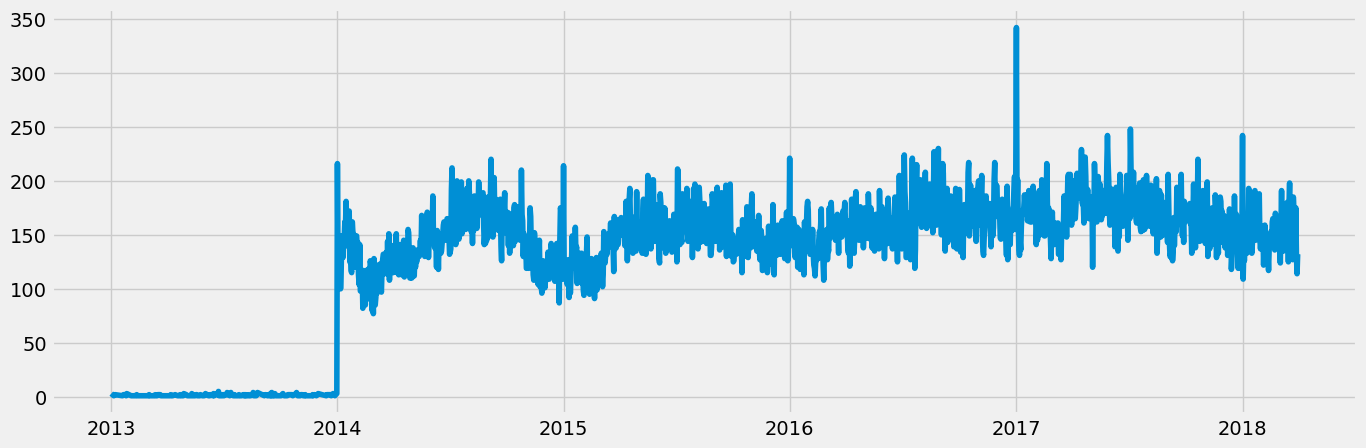

In [44]:
# Plot the new data set

line_dates= plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_dates)

In [45]:
# Save visualisation

line_dates.figure.savefig(os.path.join(path, '04. Analysis', 'line_time analysis.png'))

#### 4. Decompose the data's component

In [29]:
#Filling missing dates with 0 incidents

# Create a new DataFrame with the desired date range
start_date = df_dates.index.min()
end_date = df_dates.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')  # Daily frequency
df_missing_dates = pd.DataFrame(index=date_range)

# Merge the new DataFrame with the original DataFrame
df_dates2 = pd.merge(df_missing_dates, df_dates, left_index=True, right_index=True, how='left')

# Fill missing values
df_dates2 = df_dates2.fillna(0)
df_dates2

,incident_count
2013-01-01,3.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,1.0
...,...
2018-03-27,135.0
2018-03-28,175.0
2018-03-29,131.0
2018-03-30,114.0


In [31]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_dates2, model='additive')

In [32]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

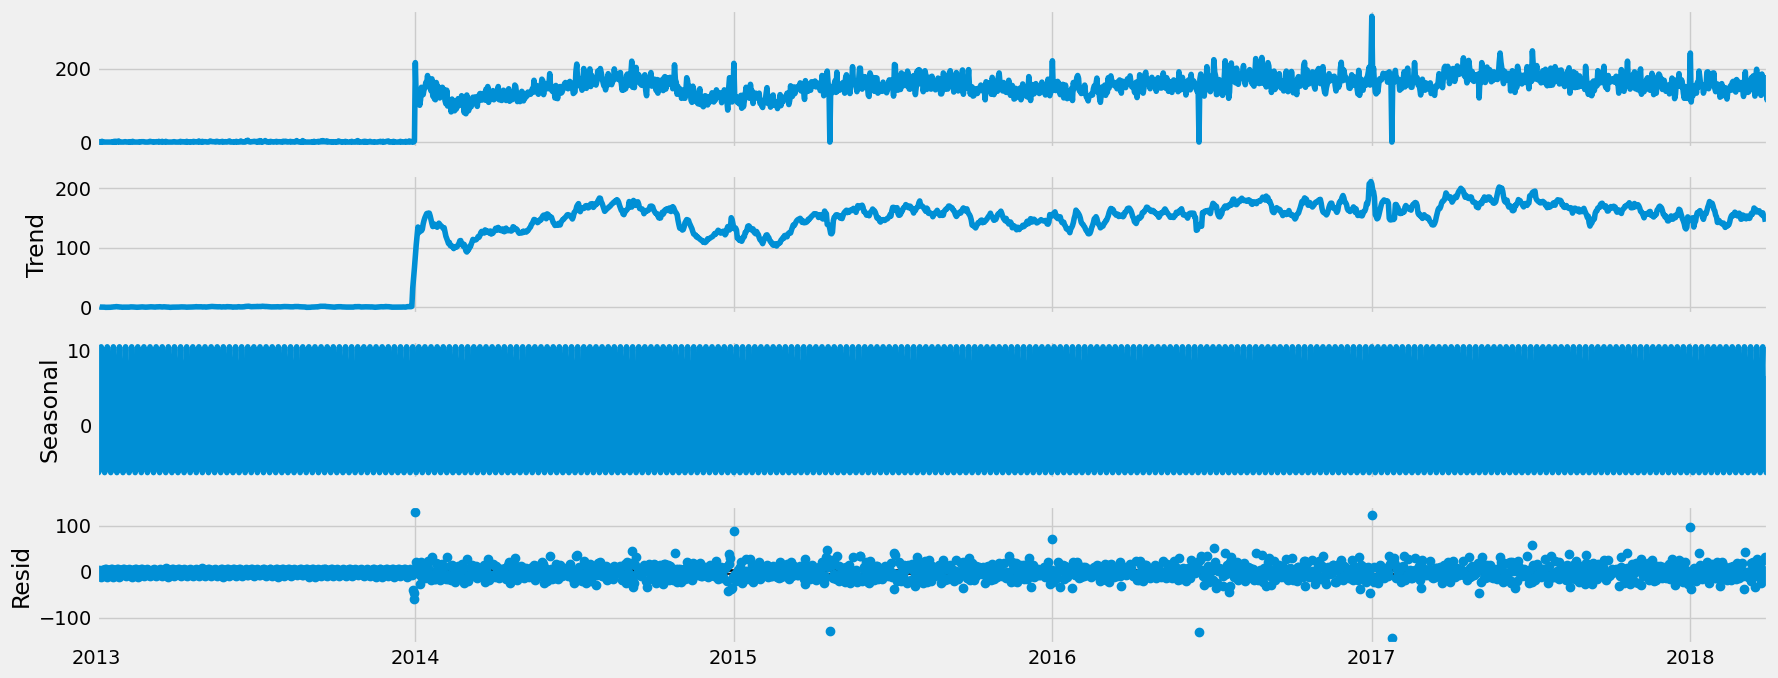

In [34]:
# Plot the separate components

decomp_dates2 = decomposition.plot()
plt.show()

In [50]:
# Save visualisation

decomp_dates2.figure.savefig(os.path.join(path, '04. Analysis', 'decomposition_dates.png'))

#### From this decomposition, we can see that the gun violence incidents do not have any seasonality time period. We can also see based on the trend there is lower gun violence incidents during end of 2014 and early 2015. After early 2015 the gun violence incident count is going upwards each year on average, with 2017 having the most count of gun violence incidents.

#### 5. Conduct a Dickey-Fuller test to check for stationarity

In [36]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_dates2['incident_count'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.157588
p-value                           0.221997
Number of Lags Used              26.000000
Number of Observations Used    1889.000000
Critical Value (1%)              -3.433816
Critical Value (5%)              -2.863071
Critical Value (10%)             -2.567585
dtype: float64


#### Based on the dickey fuller test, we can see that the test statistic is larger than all of the critical value, which means we can't reject the null hypothesis that the data is non-stationary.

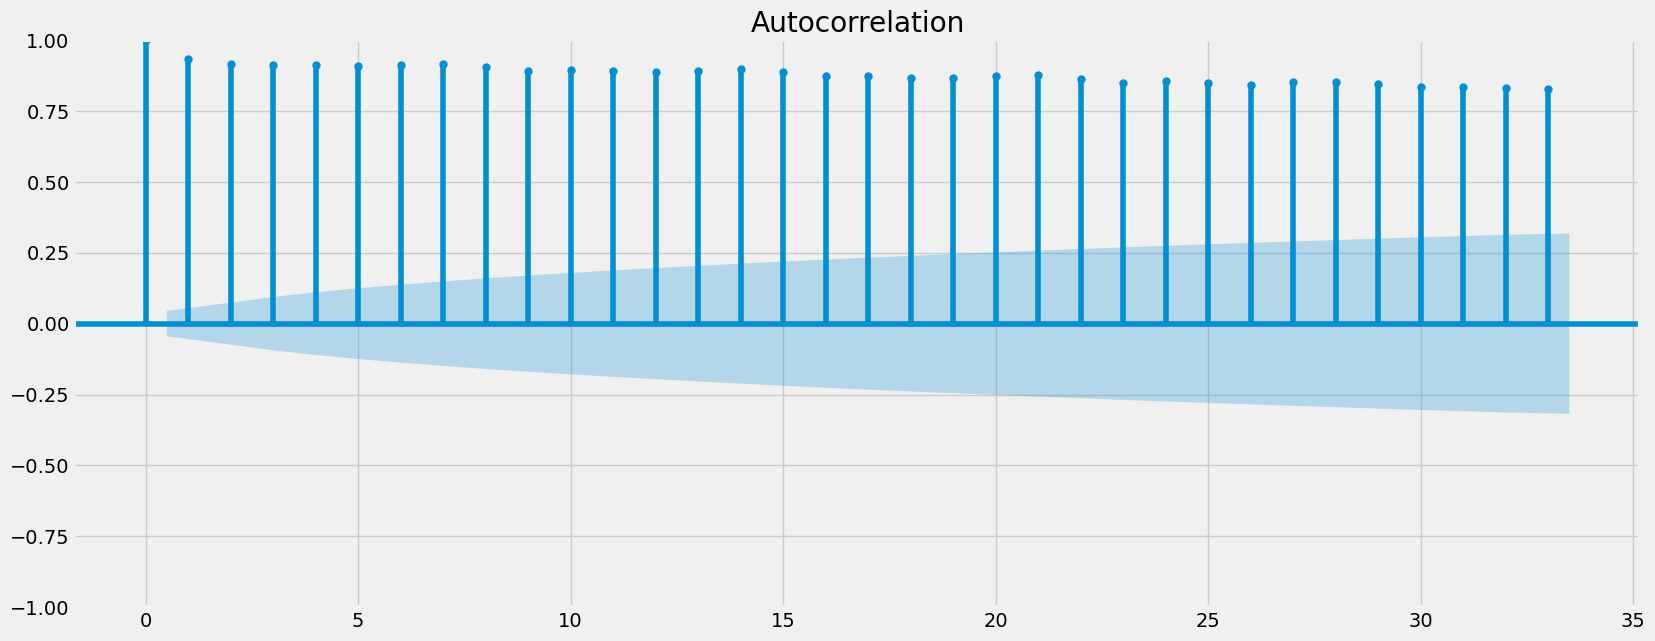

In [38]:
# Plot autocorrelations of the data

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

autocorr_dates2 = plot_acf(df_dates2)
plt.show()

In [39]:
# Save visualisation

autocorr_dates2.figure.savefig(os.path.join(path, '04. Analysis', 'autocorrelation_dates.png'))

#### 6. Stationarising data by differencing

In [40]:
data_diff = df_dates2 - df_dates2.shift(1)

In [41]:
data_diff.dropna(inplace = True)

In [42]:
data_diff.head()

,incident_count
2013-01-02,-3.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,1.0
2013-01-06,-1.0


In [43]:
data_diff.columns

Index(['incident_count'], dtype='object')

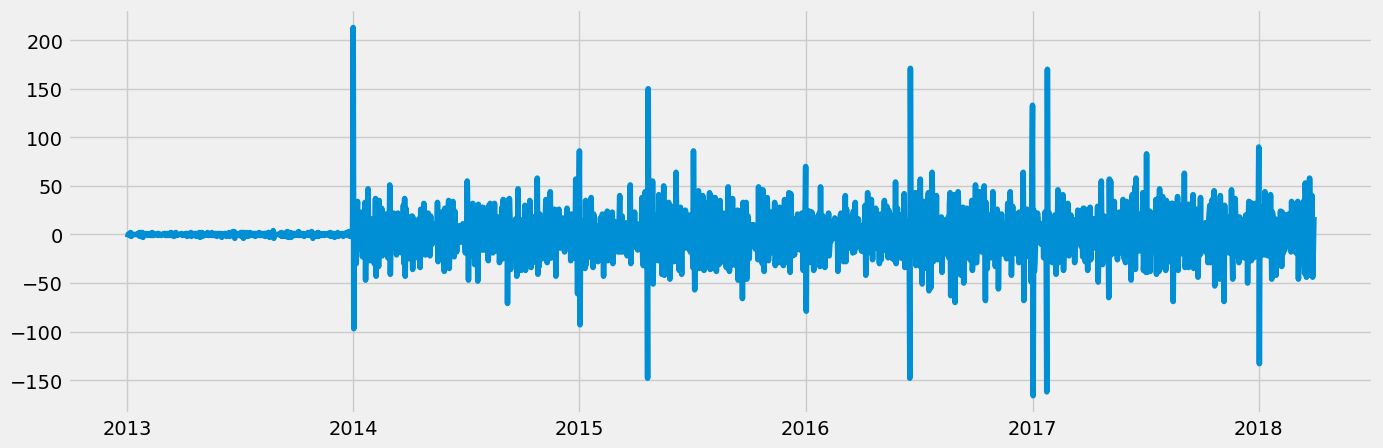

In [46]:
# Checking the result of differencing to the data

line_dates_diff = plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [47]:
# Save visualisation

line_dates_diff.figure.savefig(os.path.join(path, '04. Analysis', 'line_time differencing.png'))

In [48]:
# Apply Dickey Fuller test to the differencing data

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.015733e+01
p-value                        7.668375e-18
Number of Lags Used            2.600000e+01
Number of Observations Used    1.888000e+03
Critical Value (1%)           -3.433818e+00
Critical Value (5%)           -2.863072e+00
Critical Value (10%)          -2.567586e+00
dtype: float64


#### After differencing the data, we can see that the test statistic is smaller than all the critical values at the 1%, 5%, and 10% significance levels. This means that the null hypothesis of the Dickey-Fuller test can be rejected at all these significance levels. Therefore, the time series is considered to be stationary now.

#### 7. Checking data's autocorrelations

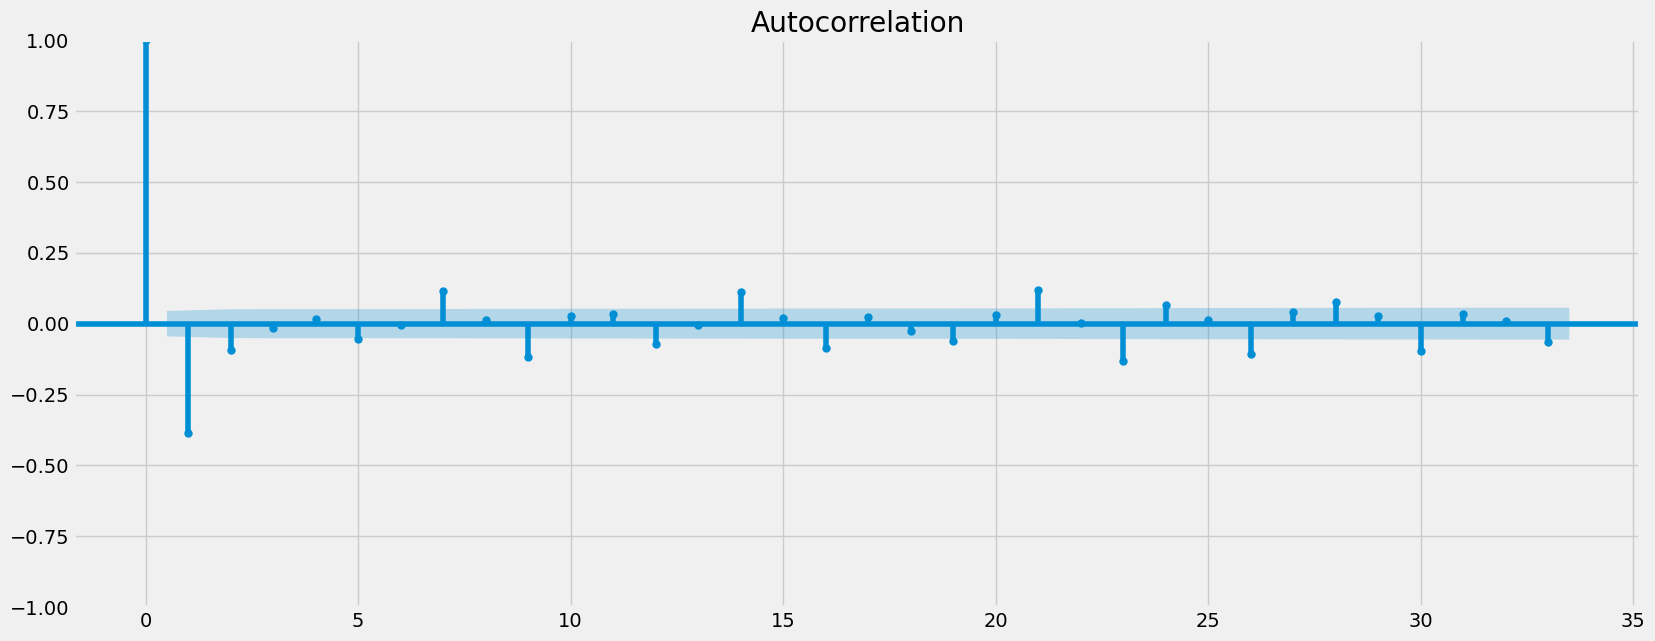

In [49]:
# Plot autocorrelations of the stationary data

autocorr_dates_diff = plot_acf(data_diff)
plt.show()

In [51]:
# Save visualisation

autocorr_dates_diff.figure.savefig(os.path.join(path, '04. Analysis', 'autocorrelation_datesdiff.png'))